In [152]:
print ('this is my first program in google colab')

this is my first program in google colab


In [153]:
import numpy as np
import pandas as pd

In [154]:
df = pd.read_csv('/placement.csv')

In [155]:
df.head(100)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [157]:
df.iloc[:,1:] # df.loc[saara chahiye, 1 se]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [158]:
df.shape

(100, 4)

In [159]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [160]:
import matplotlib.pyplot as plt

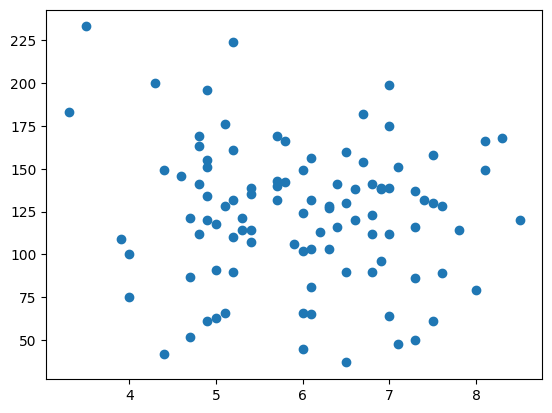

In [161]:
plt.scatter(df['cgpa'], df['iq'])

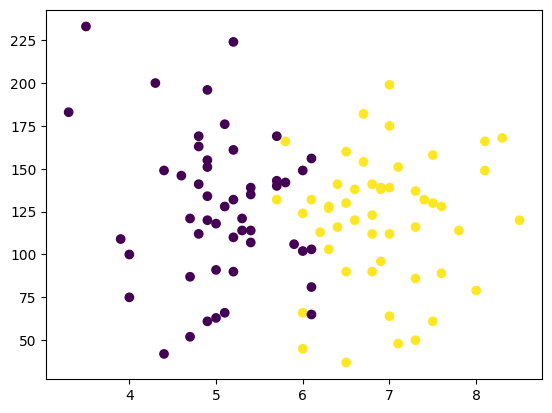

In [162]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [163]:
# 1. Extract input and output cols

In [164]:
X = df.iloc[:,1:3] #first two columns
Y = df.iloc[:,-1] # last column

In [165]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [166]:
Y.shape #1 D tensor

(100,)

In [167]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [168]:
X_train

,cgpa,iq
57,6.5,130.0
60,6.9,139.0
95,4.3,200.0
20,6.6,120.0
65,8.1,166.0
...,...,...
27,6.0,124.0
74,6.7,154.0
8,6.1,156.0
26,7.0,199.0


In [169]:
X_test

,cgpa,iq
41,5.4,114.0
43,6.8,141.0
48,6.6,138.0
68,4.0,75.0
86,5.1,128.0
32,7.0,139.0
6,5.7,143.0
5,7.1,48.0
38,6.5,160.0
18,4.0,100.0


In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
scaler = StandardScaler()

In [172]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # not fit_transform as we have already understood the pattern

In [173]:
X_train

array([[ 0.43019804,  0.14529169],
       [ 0.78138012,  0.36818235],
       [-1.50130338,  1.87888573],
       [ 0.51799356, -0.1023646 ],
       [ 1.83492635,  1.03685434],
       [-0.53555267,  0.36818235],
       [ 0.07901597,  0.19482295],
       [-0.27216611,  0.19482295],
       [ 0.07901597, -1.4644742 ],
       [-1.06232578,  0.96255745],
       [ 0.86917564, -0.30048963],
       [-0.53555267, -0.42431778],
       [-0.79893923, -1.43970857],
       [-2.37925857,  1.45787004],
       [-1.41350786, -2.03408367],
       [ 1.1325622 , -0.94439599],
       [-0.97453026, -0.1023646 ],
       [-0.27216611,  0.39294798],
       [-1.06232578,  1.11115123],
       [-1.06232578,  0.41771361],
       [-0.62334819, -0.25095838],
       [ 0.43019804, -0.84533347],
       [-0.00877955, -0.54814592],
       [ 0.86917564,  1.259745  ],
       [-0.79893923,  1.28451063],
       [ 0.25460701,  0.0709948 ],
       [ 0.6935846 , -0.02806771],
       [ 0.25460701, -0.5233803 ],
       [-2.20366753,

In [174]:
X_test

array([[-0.53555267, -0.25095838],
       [ 0.6935846 ,  0.41771361],
       [ 0.51799356,  0.34341672],
       [-1.76468994, -1.21681791],
       [-0.79893923,  0.09576043],
       [ 0.86917564,  0.36818235],
       [-0.27216611,  0.46724487],
       [ 0.95697116, -1.8854899 ],
       [ 0.43019804,  0.88826056],
       [-1.76468994, -0.59767718]])

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
clf = LogisticRegression() # clf has the power to access the functions of LogisticRegression class

In [177]:
#model train
clf.fit(X_train, Y_train) #clt.fit to train the data , training data as attributes

LogisticRegression()

In [178]:
y_pred = clf.predict (X_test) #model has predicted the test data

In [179]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [180]:
Y_test

,placement
41,0
43,1
48,1
68,0
86,0
32,1
6,0
5,1
38,1
18,0


In [181]:
# can check manually or by the library

In [182]:
from sklearn.metrics import accuracy_score

In [183]:
accuracy_score(Y_test, y_pred) #sahi wala, predicted data

1.0

In [184]:
#library from google 'mlxtend'
from mlxtend.plotting import plot_decision_regions

<Axes: >

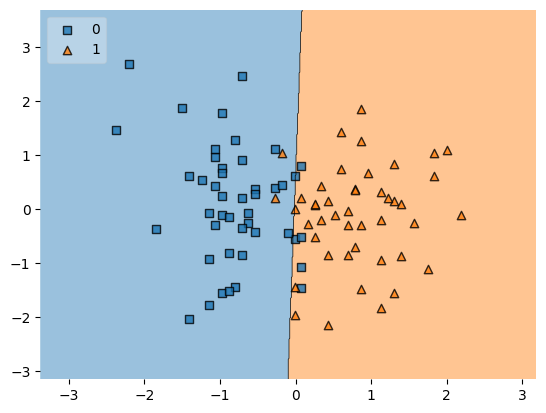

In [185]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [186]:
# pickle converts every object into file to use in the other env

In [187]:
import pickle

In [188]:
pickle.dump(clf, open('model.pkl', 'wb'))